In [3]:
import numpy as np
import matplotlib.pyplot as plt
from extract import Extract
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
import tensorflow.keras as ks
%matplotlib inline

In [4]:
#Extracting data
(x_train,y_train),(x_test,y_test) = Extract('A_Z_Data.csv',0.2)

x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

Dividing data into 297961 training and 74491 testing samples..


In [5]:
labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

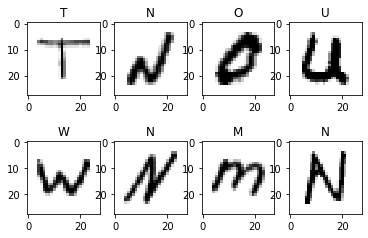

In [7]:
#lets display some data
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='binary')
    plt.title(labels[np.argmax(y_test[i])])

In [8]:
#designing the model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(28, 28, 1), name='conv1'))
model.add(MaxPool2D(pool_size=(2, 2,),name='pool1'))
model.add(Dropout(0.2,name='dropout1'))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu',name='conv2'))
model.add(MaxPool2D(pool_size=(2, 2),name='pool2'))
model.add(Flatten(name='flat'))
model.add(Dropout(0.1,name='dropout2'))
model.add(Dense(128,activation='relu',name='dense'))
model.add(Dense(26,activation='softmax',name='res'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 16)        416       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 16)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 32)        2080      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 32)          0         
_________________________________________________________________
flat (Flatten)               (None, 1568)              0         
____

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=18, batch_size=1024, verbose=1)

Train on 297960 samples, validate on 74491 samples
Epoch 1/18
297960/297960 [==============================] - 81s 271us/sample - loss: 0.6006 - acc: 0.8311 - val_loss: 0.1801 - val_acc: 0.9522
Epoch 2/18
297960/297960 [==============================] - 80s 269us/sample - loss: 0.1664 - acc: 0.9535 - val_loss: 0.1139 - val_acc: 0.9687
Epoch 3/18
297960/297960 [==============================] - 80s 267us/sample - loss: 0.1222 - acc: 0.9658 - val_loss: 0.0876 - val_acc: 0.9764
Epoch 4/18
297960/297960 [==============================] - 80s 268us/sample - loss: 0.1021 - acc: 0.9715 - val_loss: 0.0765 - val_acc: 0.9787
Epoch 5/18
297960/297960 [==============================] - 80s 268us/sample - loss: 0.0905 - acc: 0.9747 - val_loss: 0.0678 - val_acc: 0.9810
Epoch 6/18
297960/297960 [==============================] - 80s 268us/sample - loss: 0.0811 - acc: 0.9770 - val_loss: 0.0635 - val_acc: 0.9829
Epoch 7/18
297960/297960 [==============================] - 80s 268us/sample - loss: 0.0732

In [11]:
#one more epoch ¯\_(ツ)_/¯ 
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=1, batch_size=1024, verbose=1)

Train on 297960 samples, validate on 74491 samples
297960/297960 [==============================] - 80s 268us/sample - loss: 0.0376 - acc: 0.9885 - val_loss: 0.0362 - val_acc: 0.9898


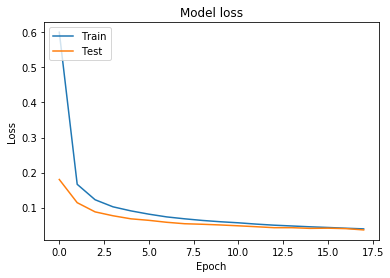

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [13]:
model.save("model.h5")